In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# K: 履約價    call: call price, 付的權利金, 成交價    ST: 到期的
# 這口交易的獲利曲線
def callr(K, call):
    ST = np.arange(12000, 14000 + 1)
    return np.maximum(ST - K, 0) - call

def putr(K, put):
    ST = np.arange(12000, 14000 + 1)
    return np.maximum(K - ST, 0) - put

In [3]:
x1 = np.arange(12000, 14000 + 1)

* 履約價 權利金(買權) 權利金(賣權)
* 12600  382  39
* 12800 226 80
* 12900 158 112
* 13000 106 158
* 13200 36.5 291

In [4]:
premium_call = {12600: 382, 12800: 226, 12900: 158, 13000: 106, 13200: 36.5}
premium_put = {12600: 39, 12800: 80, 12900: 112, 13000: 158, 13200: 291}

## 1. 用履約價為12800，12900，13000三種買權排列組合出不同的bull spread，並分別用紅、綠、藍三種不同顏色的線畫出損益曲線，並比較三者在不同到期價時的優缺點

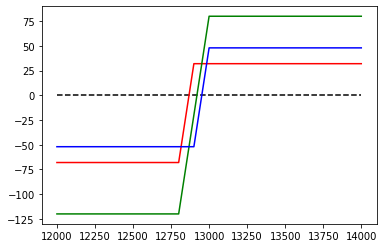

In [5]:
plt.plot([x1[0], x1[-1]], [0, 0], '--k')
# buy 12800 sell 12900
y1 = callr(12800, premium_call[12800])
y2 = -callr(12900, premium_call[12900])
plt.plot(x1, y1 + y2, 'r')
# buy 12800 sell 13000
y1 = callr(12800, premium_call[12800])
y2 = -callr(13000, premium_call[13000])
plt.plot(x1, y1 + y2, 'g')
# buy 12900 sell 13000
y1 = callr(12900, premium_call[12900])
y2 = -callr(13000, premium_call[13000])
plt.plot(x1, y1 + y2, 'b')

* buy 12800 sell 12900: 獲利時(>12900)賺不多，賠錢時(<12800)卻賠不少，過渡期(漲跌幅小)時表現最好，最大獲利(大漲)時表現最差
* buy 12900 sell 13000: 最大獲利(>13000)和最大損失(<12750)差不多，最大損失(大跌)時表現最好，過渡期(漲跌幅小)時表現最差
* buy 12800 sell 13000: 在到期價大於13000時賺最多，但是在到期價小於12750時賠最多，最大獲利(大漲)時表現最好，最大損失(大跌)時表現最差
* 最大獲利(大漲)時: buy 12800 sell 13000 > buy 12900 sell 13000 > buy 12800 sell 12900
* 最大虧損(大跌)時: buy 12900 sell 13000 > buy 12800 sell 12900 > buy 12800 sell 13000
* 過渡期(漲跌幅小)時: buy 12800 sell 12900 > buy 12800 sell 13000 > buy 12900 sell 13000
* 大部分時期，buy 12900 sell 13000 都是比 buy 12800 sell 12900 好的

## 2. 假設加權股價持續盤整，直到到期日前均會在12900附近震盪，
##  A.	使用履約價為12900的買賣權建構straddle
##  B.	使用履約價為12800和13000的買賣權建構strangle
## 分別用紅線及綠線繪製兩者的損益曲線，並簡述其優缺點

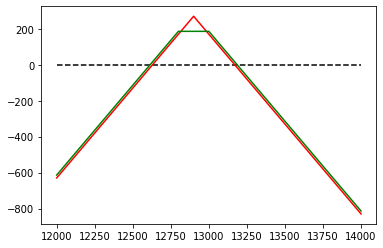

In [6]:
plt.plot([x1[0], x1[-1]], [0, 0], '--k')
# straddle 跨式
y1 = -callr(12900, premium_call[12900])
y2 = -putr(12900, premium_put[12900])
plt.plot(x1, y1 + y2, 'r')
# strangle 勒式
y1 = -callr(13000, premium_call[13000])
y2 = -putr(12800, premium_put[12800])
plt.plot(x1, y1 + y2, 'g')

* strangle: 最高獲利較大，漲跌幅小時、在12900附近震盪時較優秀; 但獲利範圍較窄，漲跌幅較大時較悽慘
* straddle: 獲利範圍較廣，漲跌幅較大時較優秀; 但最高獲利較少，漲跌幅較小時、在12900附近震盪時較悽慘

## 3.	用履約價相同的買賣權，可以組合出等同於放空一口指數的商品
## A.	請使用履約價分別為12600及13200的買賣權建構此組合，以紅線及綠線繪製損益曲線，試比較兩者之優缺點
## B.	在這四口選擇權中，存在套利空間，分別說明需買或賣哪幾口選擇權 


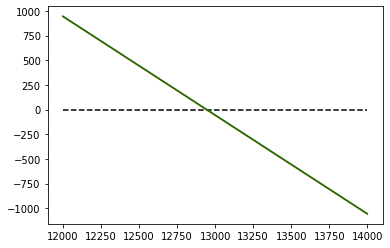

In [7]:
plt.plot([x1[0], x1[-1]], [0, 0], '--k')
# K = 12600
y1 = -callr(12600, premium_call[12600])
y2 = putr(12600, premium_put[12600])
plt.plot(x1, y1 + y2, 'r')
# K = 13200
y1 = -callr(13200, premium_call[13200])
y2 = putr(13200, premium_put[13200])
plt.plot(x1, y1 + y2, 'g')

* 兩種組合的結果一模一樣，無法套利
* 不存在套利空間，因為是市場資料，有套利空間的話早就被程式交易發現並套利掉了
* 有套利空間的話，就做多下面的線的組合做空上面的線的組合，也就是買上面的線的組合賣下面的線的組合

## 4.	請用三種不同履約價的買權，組合出預期市場盤整時的butterfly spread，並簡述其應用情境

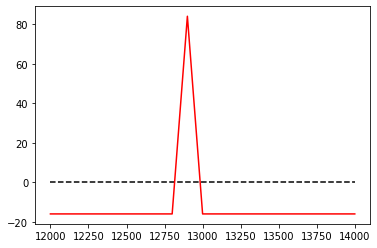

In [8]:
plt.plot([x1[0], x1[-1]], [0, 0], '--k')
y1 = callr(12800, premium_call[12800])
y2 = callr(13000, premium_call[13000])
y3 = 2 * -callr(12900, premium_call[12900])
plt.plot(x1, y1 + y2 + y3, 'r')

* 應用情境: 認為加權股價持續盤整，直到到期日前均會在12900附近震盪